<a href="https://colab.research.google.com/github/Academic-Ayda-z/Pattern-recognition/blob/main/mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

def plot_eigenvalues(eigenvalues):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(eigenvalues)), eigenvalues)
    plt.title('Eigenvalues of Covariance Matrix')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.show()


In [3]:
import pandas as pd

# Specify the path to your CSV file
csv_path = '/content/drive/MyDrive/pattern_1semester/mini2/trainData.csv'
df = pd.read_csv(csv_path,header=None)
labels=pd.read_csv("/content/drive/MyDrive/pattern_1semester/mini2/trainLabels.csv",header=None)
X_TEST=pd.read_csv("/content/drive/MyDrive/pattern_1semester/mini2/testData.csv",header=None)
labels_test=pd.read_csv("/content/drive/MyDrive/pattern_1semester/mini2/testLabels.csv",header=None)

In [4]:
x_train=df.copy()
x_test = X_TEST.copy()

y_train=labels.copy()
y_test =labels_test.copy()

In [5]:
import numpy as np

class GBClassifier:

    def fit(self, X, y, epsilon = 1e-10):
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        self.phi_y = 1.0 * y_counts/len(y)
        self.u = np.array([ X[y==k].mean(axis=0) for k in self.y_classes])
        self.E = self.compute_sigma(X, y)
        self.E += np.ones_like(self.E) * epsilon
        self.invE = np.linalg.pinv(self.E)
        return self

    def compute_sigma(self,X, y):
        X_u = X.copy().astype('float64')
        for i in range(len(self.u)):
            X_u[y==self.y_classes[i]] -= self.u[i]
        return X_u.T.dot(X_u) / len(y)

    def predict(self, X):
        return np.apply_along_axis(self.get_prob, 1, X)

    def score(self, X, y):
        return (self.predict(X) == y).mean()

    def get_prob(self, x):
        p = np.exp(-0.5 * np.sum((x - self.u).dot(self.invE) * (x - self.u), axis =1)) * self.phi_y
        return np.argmax(p)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def pca(X, num_components):
    # Standardization
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # covariance matrix
    covariance_matrix = np.cov(X_std, rowvar=False)

    #eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    #plot_eigenvalues(eigenvalues)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Transformation
    X_pca = np.dot(X_std, principal_components)

    return X_pca, eigenvalues, principal_components

PCA

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x_train=df.copy()
x_test = X_TEST.copy()

y_train=labels.copy()
y_test =labels_test.copy()

# Standardization
mean=np.mean(x_train, axis=0)
print(type(x_train),mean.shape)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Flatten the images
x_train = x_train.values.reshape(-1, 28*28)
x_test = x_test.values.reshape(-1, 28*28)

# Compute the covariance matrix
covariance_matrix = np.cov(x_train, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues and select the top k eigenvectors
k = 20
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors = eigenvectors[:, :k]

# Project the original data onto the new subspace
x_train_pca = x_train.dot(eigenvectors)
x_test_pca = x_test.dot(eigenvectors)

<class 'pandas.core.frame.DataFrame'> (784,)


In [9]:
model = GBClassifier().fit(x_train_pca,np.ravel(y_train))
model.score(x_test_pca,np.ravel(y_test))

0.7399

In [21]:
import math
#distance xand xbars for every i
x_= pd.DataFrame(np.dot(eigenvectors,x_train_pca.T)) + mean
distances=[]
for i in range(len(x_.shape)):
  distances.append(math.dist(x_[i],x_train[i]))
print(sum(distances)/len(distances))

16.202829096860384


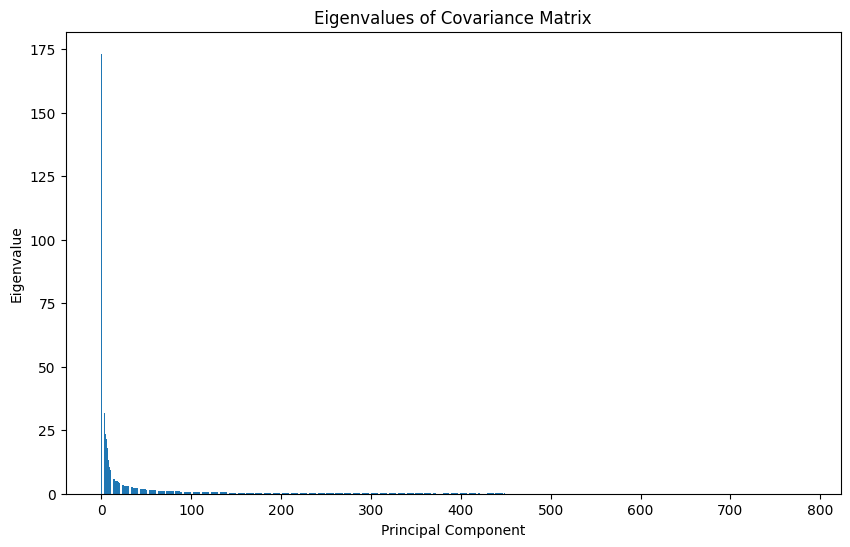

In [10]:
plot_eigenvalues(eigenvalues)

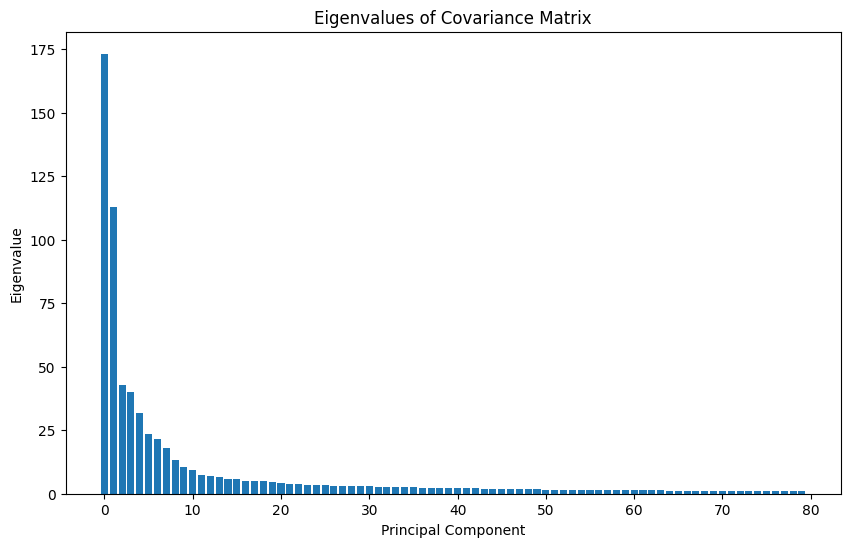

In [11]:
plot_eigenvalues(eigenvalues[:80])

Classifier

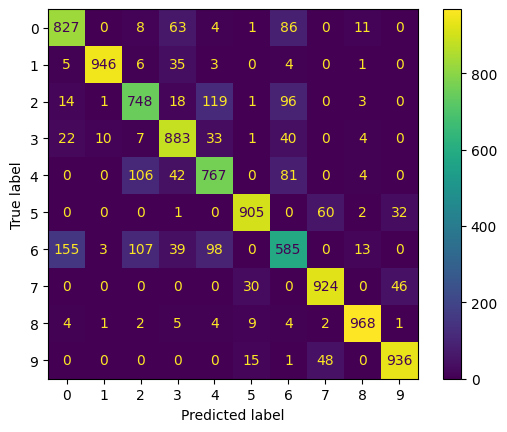

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Train a classifier.
clf = SVC(random_state=0)
clf.fit(x_train_pca, np.ravel(y_train))

# Make predictions.
predictions = clf.predict(x_test_pca)

# Compute the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a ConfusionMatrixDisplay object.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix.
disp.plot()
plt.show()

In [ ]:
x_train=df.copy()
x_test = X_TEST.copy()

y_train=labels.copy()
y_test =labels_test.copy()

class_labels = np.unique(y_train)
n_features=x_train.shape[0]
# Within class scatter matrix:
# SW = sum((X_c - mean_X_c)^2 )

# Between class scatter:
# SB = sum( n_c * (mean_X_c - mean_overall)^2 )

mean_overall = np.mean(x_train, axis=0)
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))
for c in class_labels:
    X_c = np.take(np.array(x_train),np.where(y_train == c)[0])
    mean_c = np.mean(X_c, axis=0)
    # (4, n_c) * (n_c, 4) = (4,4) -> transpose
    SW += (X_c - mean_c).T.dot((X_c - mean_c))

    # (4, 1) * (1, 4) = (4,4) -> reshape
    n_c = X_c.shape[0]
    mean_diff = np.array(mean_c - mean_overall).reshape(n_features, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)
# Determine SW^-1 * SB
A = np.linalg.pinv(SW).dot(SB)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)

In [ ]:
# Plot the eigenvalues
import matplotlib.pyplot as plt

plt.plot(sorted(eigenvalues.real)[::-1][:100])
plt.show()

In [ ]:
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

features_num=30
X_train_projected = np.dot(x_train, eigenvectors[:features_num].T)
X_test_projected = np.dot(x_test, eigenvectors[:features_num].T)

In [ ]:
model = GBClassifier().fit(X_train_projected.real,np.ravel(y_train))
model.score(X_test_projected.real,np.ravel(y_test))

Confusion matrix


3

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Train a classifier.
clf = SVC(random_state=0)
clf.fit(X_train_projected.real, np.ravel(y_train))

# predictions.
predictions = clf.predict(X_test_projected.real)

#  confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a ConfusionMatrixDisplay object.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix.
disp.plot()
plt.show()


In [ ]:
# List to store the number of features
num_features_list = list(range(1, x_train.shape[1] + 1))

# List to store the accuracies
accuracies = []

# Iterate over the number of features
for num_features in num_features_list:
   # Project the data into the new subspaces
   selected_eigenvectors = eigenvectors[:, :num_features]
   X_train_projected = np.dot(x_train, selected_eigenvectors)
   X_test_projected = np.dot(x_test, selected_eigenvectors)

   # Apply the Bayes classifier
   model = GBClassifier().fit(X_train_projected.real,np.ravel(y_train))

   # Compute the accuracy
   accuracy = model.score(X_test_projected.real,np.ravel(y_test))
   accuracies.append(accuracy)

# Plot the accuracies
plt.plot(num_features_list, accuracies)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of features')
plt.show()
